<a href="https://colab.research.google.com/github/ftornay/eulerian-remote-heartrate-detection/blob/master/Heartrate_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/ftornay/eulerian-remote-heartrate-detection.git

Cloning into 'eulerian-remote-heartrate-detection'...
remote: Enumerating objects: 64, done.
remote: Total 64 (delta 0), reused 0 (delta 0), pack-reused 64
Unpacking objects: 100% (64/64), done.


In [4]:
cd eulerian-remote-heartrate-detection

/content/eulerian-remote-heartrate-detection


In [5]:
!cat main.py

import cv2
import pyramids
import heartrate
import preprocessing
import eulerian

# Frequency range for Fast-Fourier Transform
freq_min = 1
freq_max = 1.8

# Preprocessing phase
print("Reading + preprocessing video...")
video_frames, frame_ct, fps = preprocessing.read_video("videos/rohin_active.mov")

# Build Laplacian video pyramid
print("Building Laplacian video pyramid...")
lap_video = pyramids.build_video_pyramid(video_frames)

amplified_video_pyramid = []

for i, video in enumerate(lap_video):
    if i == 0 or i == len(lap_video)-1:
        continue

    # Eulerian magnification with temporal FFT filtering
    print("Running FFT and Eulerian magnification...")
    result, fft, frequencies = eulerian.fft_filter(video, freq_min, freq_max, fps)
    lap_video[i] += result

    # Calculate heart rate
    print("Calculating heart rate...")
    heart_rate = heartrate.find_heart_rate(fft, frequencies, freq_min, freq_max)

# Collapse laplacian pyramid to generate final video
print("Rebuild

In [0]:
import cv2
import pyramids
import heartrate
import preprocessing
import eulerian

In [0]:
# Frequency range for Fast-Fourier Transform
freq_min = 1
freq_max = 1.8

In [8]:
# Preprocessing phase
print("Reading + preprocessing video...")
video_frames, frame_ct, fps = preprocessing.read_video("videos/rohin_active.mov")

Reading + preprocessing video...


In [9]:
# Build Laplacian video pyramid
print("Building Laplacian video pyramid...")
lap_video = pyramids.build_video_pyramid(video_frames)

Building Laplacian video pyramid...


In [10]:
amplified_video_pyramid = []

for i, video in enumerate(lap_video):
    if i == 0 or i == len(lap_video)-1:
        continue

    # Eulerian magnification with temporal FFT filtering
    print("Running FFT and Eulerian magnification...")
    result, fft, frequencies = eulerian.fft_filter(video, freq_min, freq_max, fps)
    lap_video[i] += result

    # Calculate heart rate
    print("Calculating heart rate...")
    heart_rate = heartrate.find_heart_rate(fft, frequencies, freq_min, freq_max)

Running FFT and Eulerian magnification...
Calculating heart rate...


In [12]:
# Collapse laplacian pyramid to generate final video
print("Rebuilding final video...")
amplified_frames = pyramids.collapse_laplacian_video_pyramid(lap_video, frame_ct)

Rebuilding final video...


Heart rate:  67.09265175718849 bpm
Displaying final video...


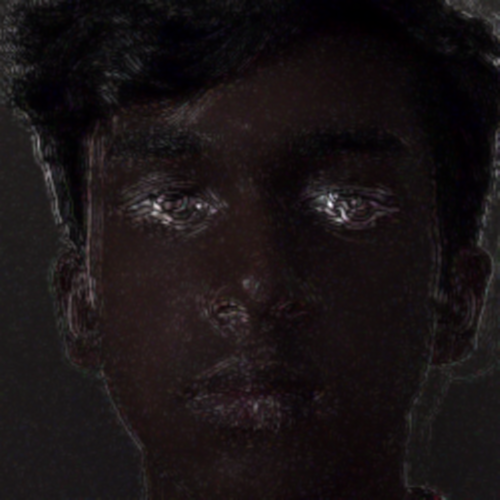

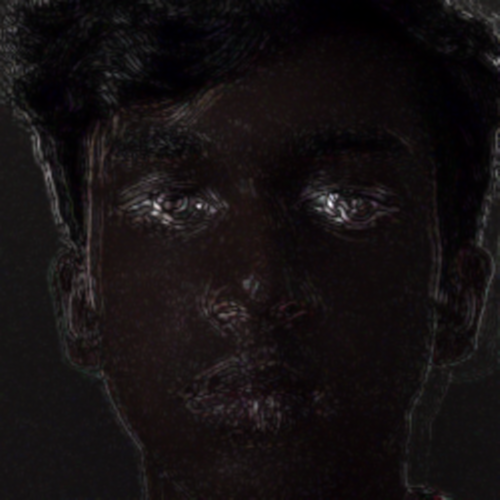

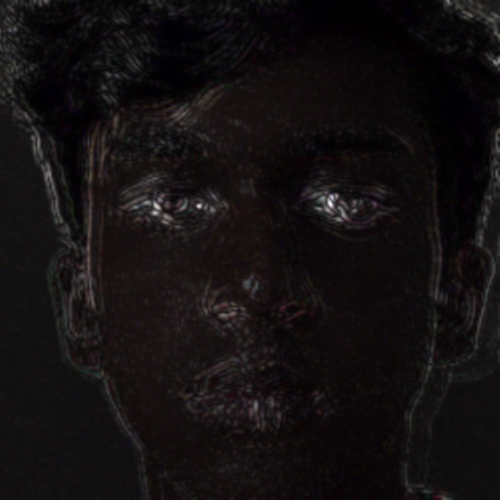

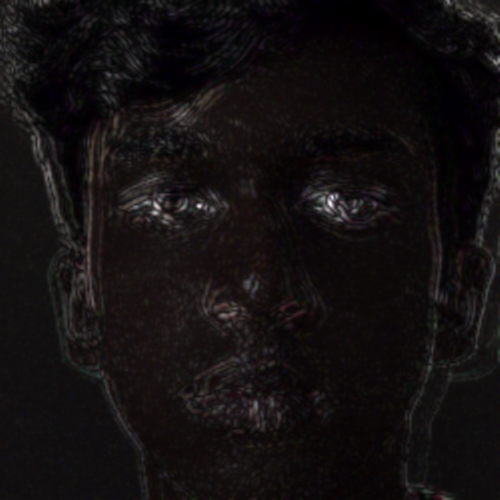

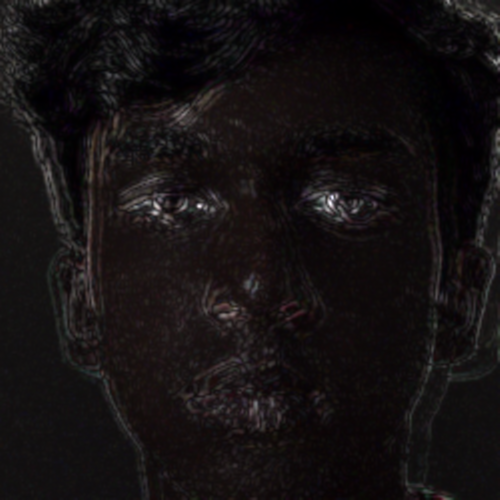

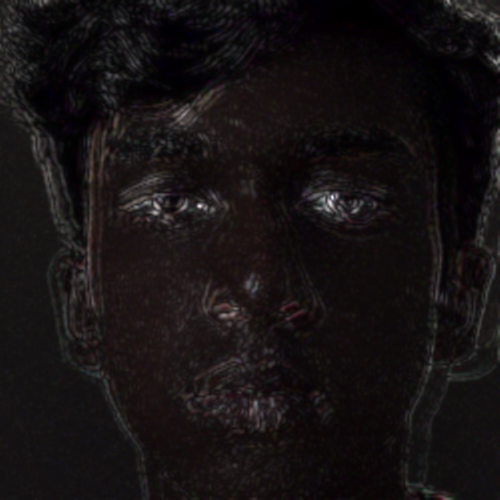

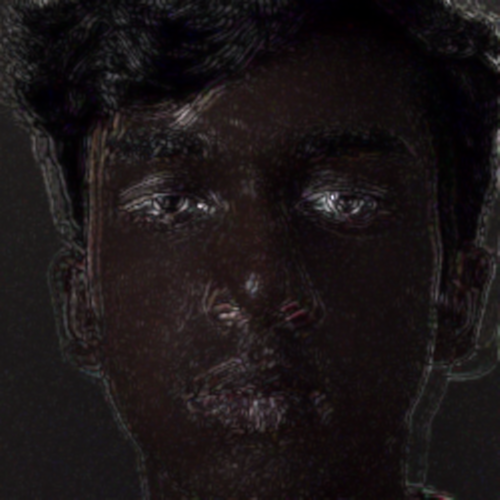

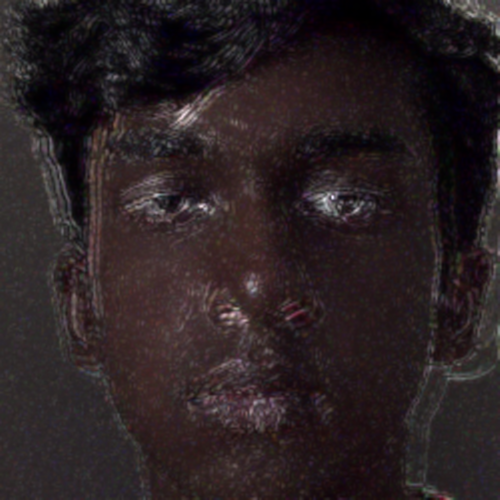

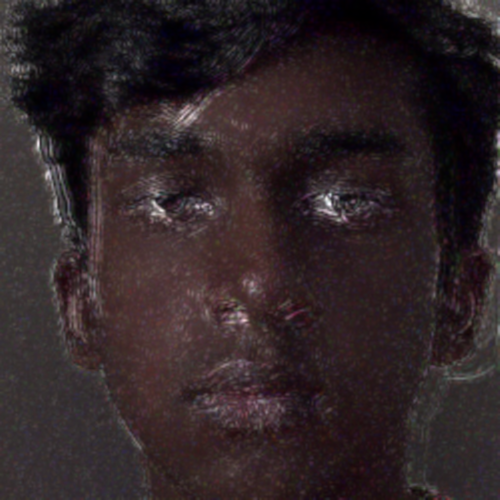

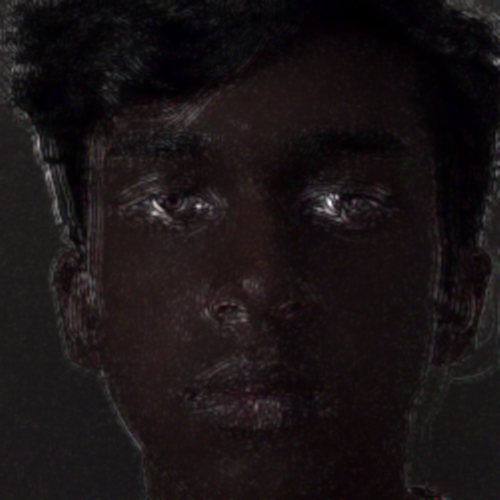

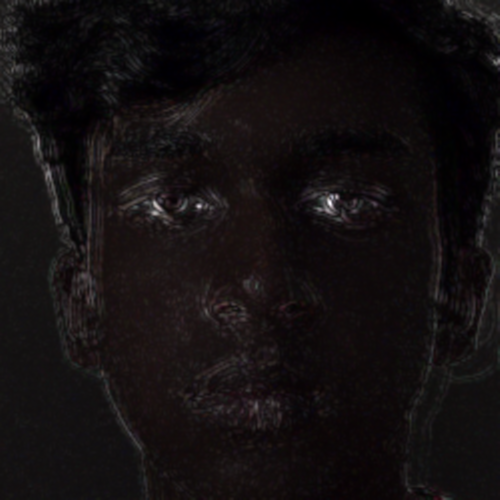

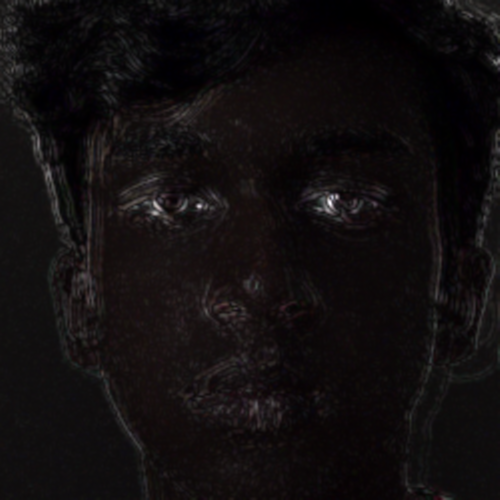

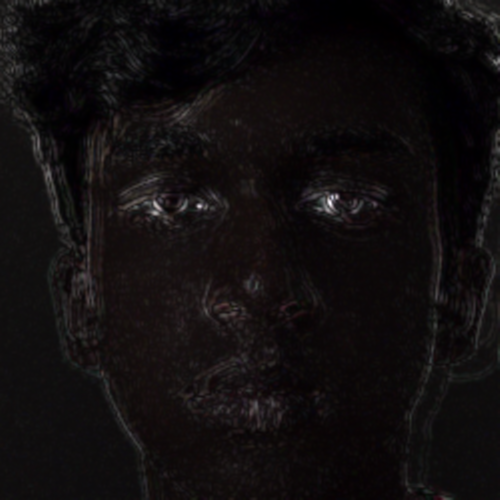

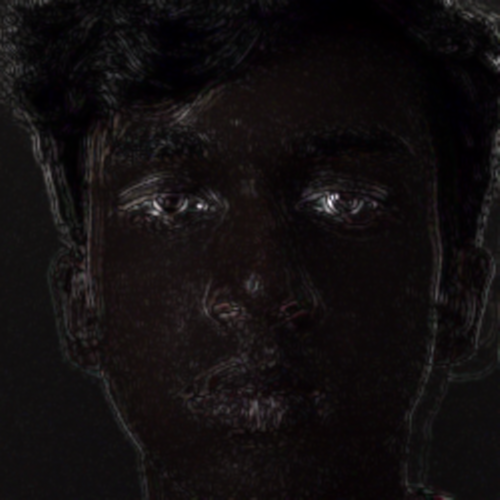

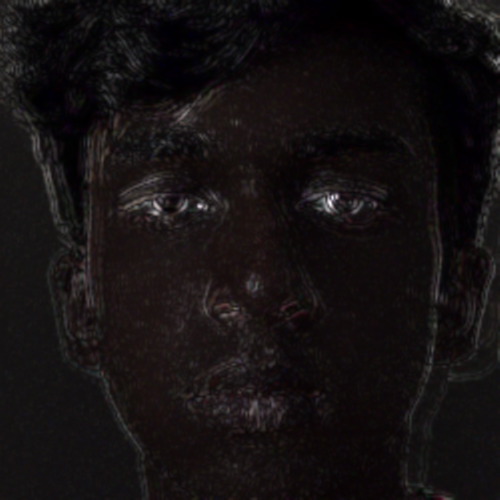

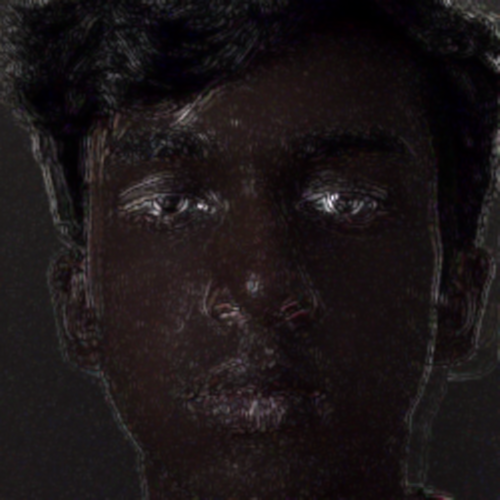

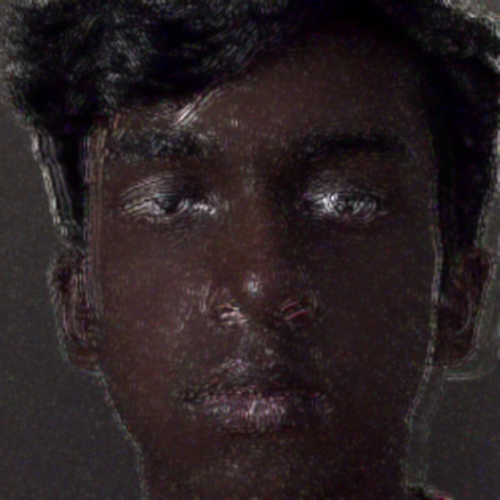

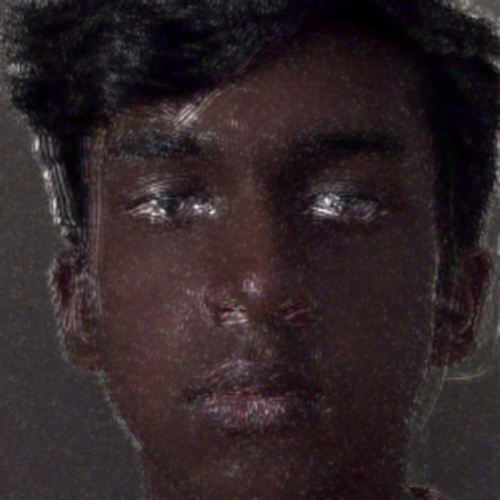

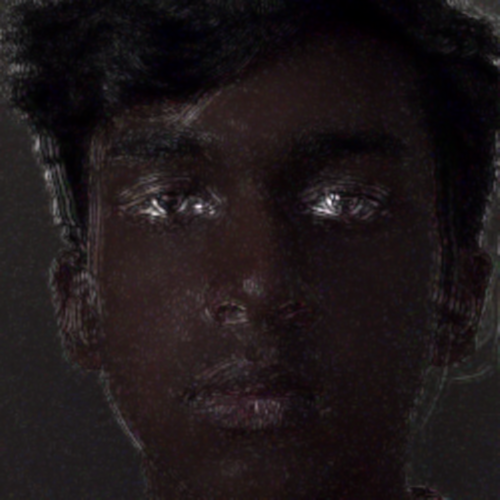

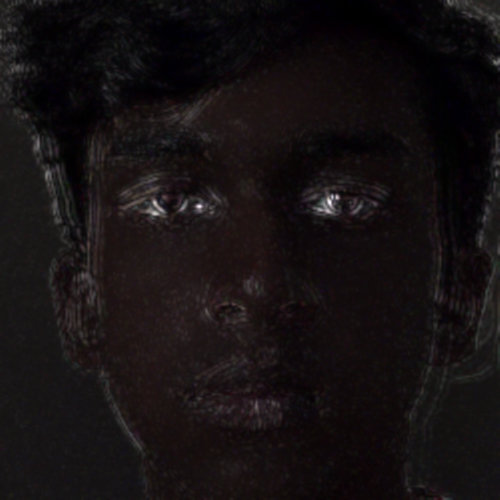

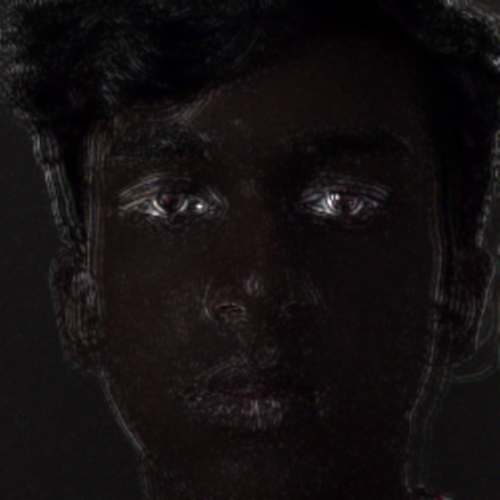

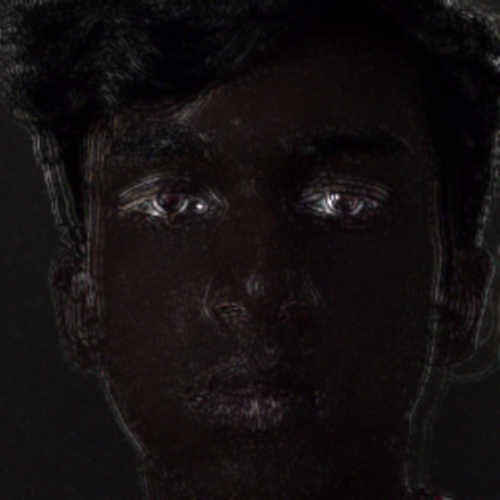

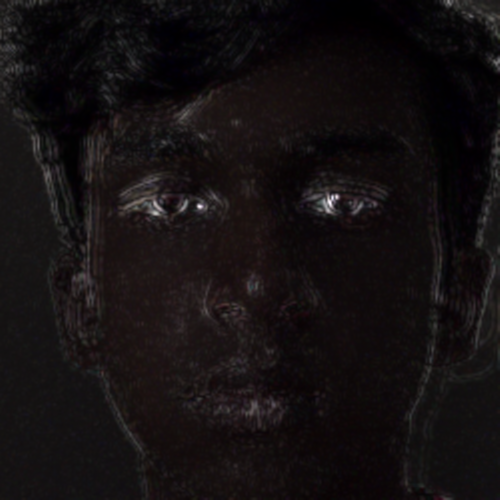

In [0]:
from google.colab.patches import cv2_imshow # Replaces cv2.imshow in Colab
# Output heart rate and final video
print("Heart rate: ", heart_rate, "bpm")
print("Displaying final video...")

for frame in amplified_frames:
    cv2_imshow(frame)
    cv2.waitKey(20)